## Домашняя работа #2.
Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе: https://forms.gle/uLK765hzD8RhvyNx8

Отправлять ссылку через форму нужно только один раз. Исправления вносятся в тот же ноутбук до хард-дедлайна и помечаются комментариями в коде и комментариями к соотвествующим ячейкам.

Эта домашка про Фурье и немного про простейшие фильтры.

**Soft deadline: 10.02.2022 03:00:00 +0003 GMT**

**Hard deadline: 17.02.2022 03:00:00 +0003 GMT**

Ссылка на материалы: https://drive.google.com/drive/folders/1WZsXgicKZYJ4-OOGGQcLUpj7T_u60for?usp=sharing

In [ ]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/CVmaterials") 

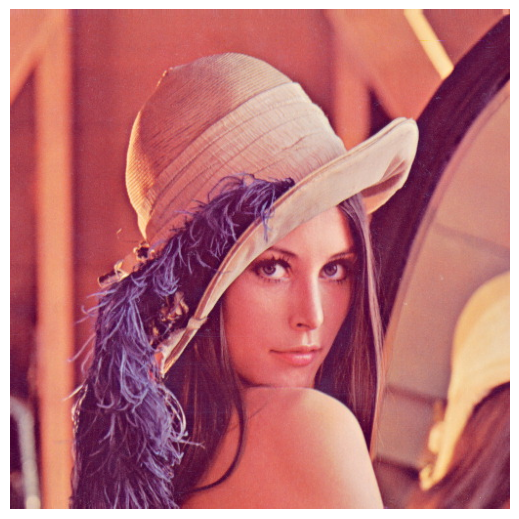

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import imshow
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(10, 5))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

lena = cv2.imread(str(sources_path / "lena.jpg"))
show_bgr(lena)



**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

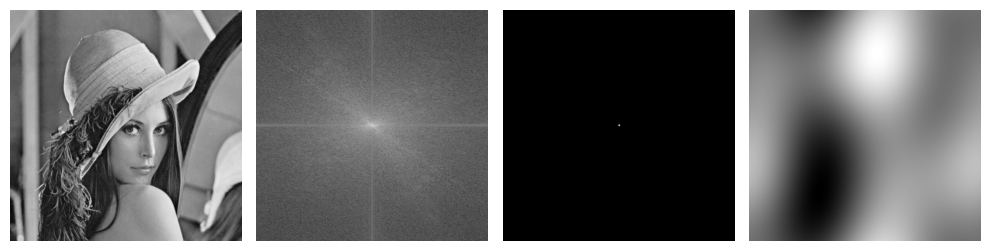

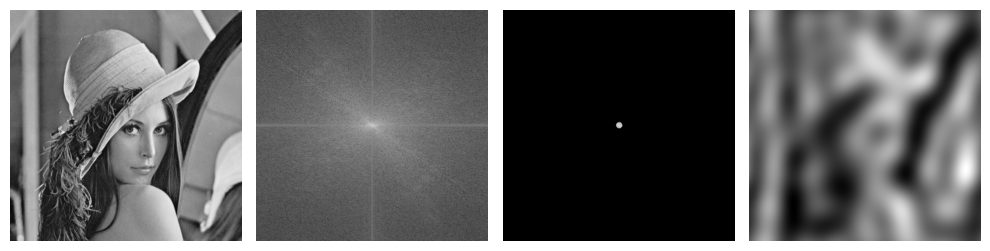

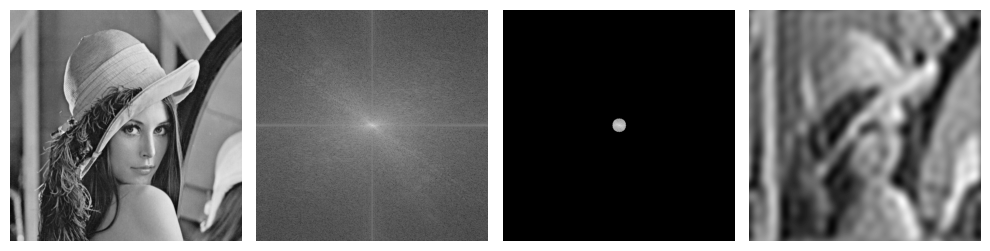

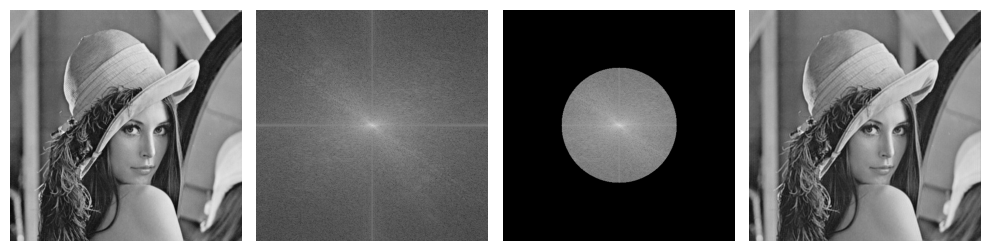

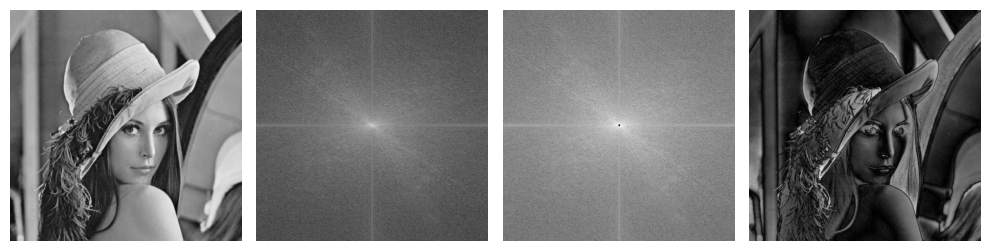

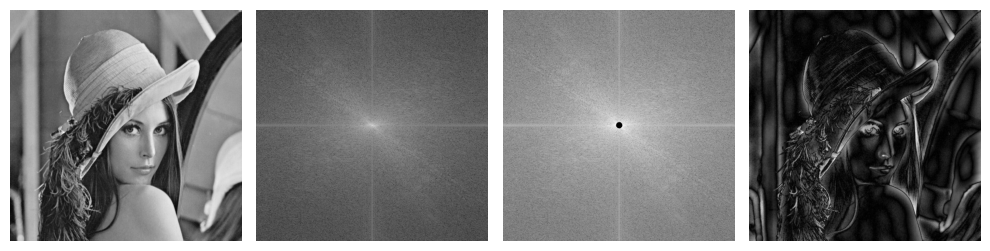

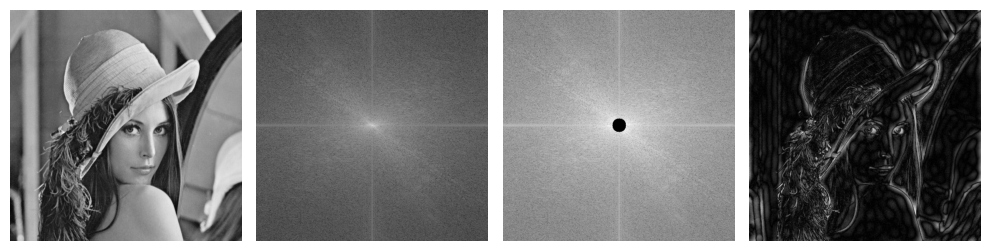

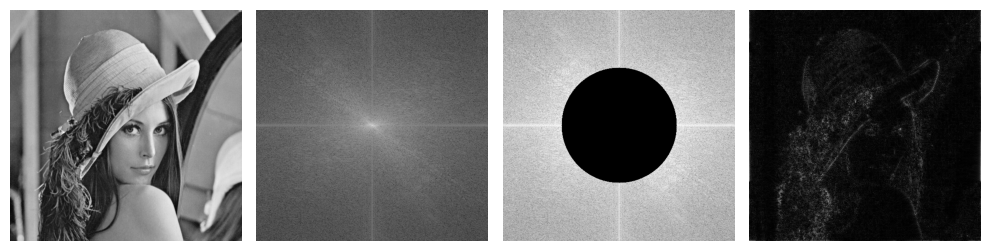

In [ ]:
def magn(a, ln=True):
    magn = cv2.magnitude(a[:, :, 0], a[:, :, 1])
    if ln:
      magn = np.log(1 + magn)
    return magn

def plot_line(imgs):
  n = len(imgs)
  plt.figure(figsize=(10, 10))
  for i, img in enumerate(imgs):
    plt.subplot(1, n, i+1)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.tight_layout()

def swapq(img):
  h, w = img.shape[:2]
  out = img.copy()
  out[:h//2, :w//2], out[h//2:, w//2:] = out[h//2:, w//2:].copy(), out[:h//2, :w//2].copy()  
  out[h//2:, :w//2], out[:h//2, w//2:] = out[:h//2, w//2:].copy(), out[h//2:, :w//2].copy()
  return out

lena = cv2.imread("/content/drive/MyDrive/CVmaterials/lena.jpg")

def fltr(lena, D, filter_type="low"):
  lena_dft = cv2.merge([np.float32(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)), np.zeros(lena.shape[:2], np.float32)])
  
  lena_dft = swapq(cv2.dft(lena_dft))
  #np.log(cv2.magnitude(lena_dft[:,:,0], lena_dft[:,:,1])+1)

  if filter_type == "low":
    mask = np.zeros(lena.shape[:2], np.float32)
    x, y = mask.shape[:2]
    #mask[x//2 - D//2:x//2+D//2, y//2-D//2:y//2+D//2] = 1 
    mask = cv2.circle(mask, (x//2, y//2), d//2, 1, -1)

  elif filter_type == "high":
    mask = np.ones(lena.shape[:2], np.float32)
    x, y = mask.shape[:2]
    #mask[x//2 - D//2:x//2+D//2, y//2-D//2:y//2+D//2] = 0
    mask = cv2.circle(mask, (x//2, y//2), d//2, 0, -1)

  mask = cv2.merge([mask] * 2)
  fourier_flt = cv2.mulSpectrums(lena_dft, mask, 0)
  out_lena = magn(cv2.idft(swapq(fourier_flt)), ln=False)

  imgs = [cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY), magn(lena_dft), magn(fourier_flt), out_lena]
  return imgs

for d in [5, 15, 30, 255]:
  imgs = fltr(lena, d)
  plot_line(imgs)

for d in [5, 15, 30, 255]:
  imgs = fltr(lena, d, filter_type="high")
  plot_line(imgs)

**2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

3484.66450881958


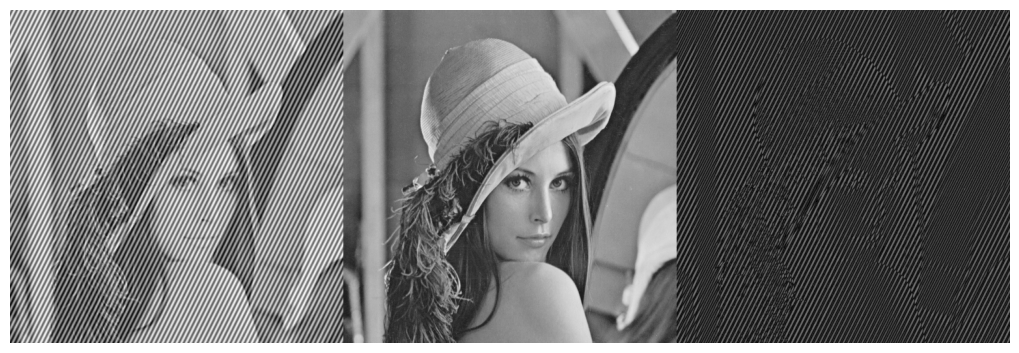

In [ ]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)

print(mse(lena_diag, lena_gray_fix))
show_gray(np.hstack([lena_diag.astype(int), lena_gray_fix.astype(int), np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))]))

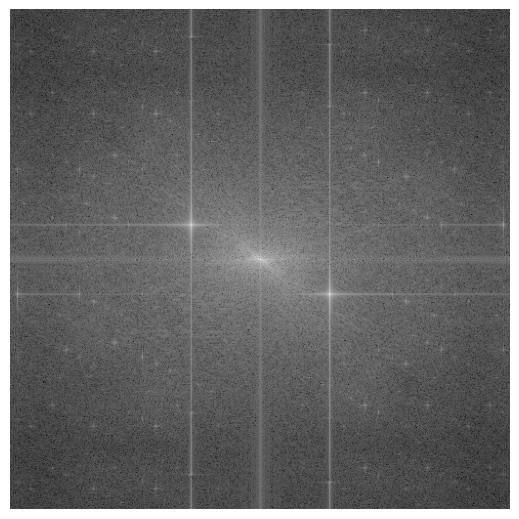

In [ ]:
lena_diag_dft = cv2.merge([np.float32(lena_diag), np.zeros(lena.shape[:2], np.float32)])
lena_diag_dft = swapq(cv2.dft(lena_diag_dft))
show_gray(magn(lena_diag_dft))

MSE: 1103.2462043762207


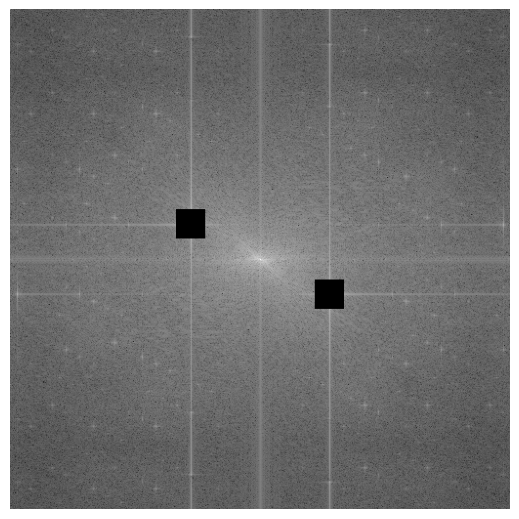

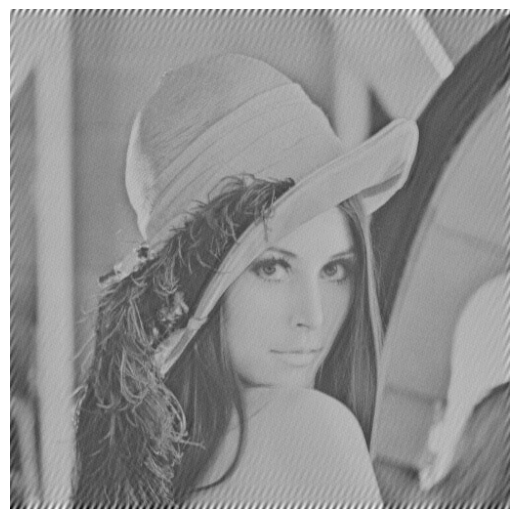

In [ ]:
mask = np.ones(lena_diag_dft.shape[:2], np.float32)
x, y = mask.shape[:2]
dx, dy = 35, 70
w = 15
mask[255-dx-w:255-dx+w, 255-dy-w:255-dy+w] = 0
mask[255+dx-w+2:255+dx+w+2, 255+dy-w+2:255+dy+w+2] = 0
mask = cv2.merge([mask] * 2)
fourier_flt = cv2.mulSpectrums(lena_diag_dft, mask, 0)
fourier_flt = fourier_flt
show_gray(magn(fourier_flt))

undiag_lena = magn(cv2.idft(swapq(fourier_flt)), ln=False)
undiag_lena = undiag_lena/np.max(undiag_lena)*256
show_gray(undiag_lena)
print("MSE:", mse(undiag_lena, lena_gray_fix))

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу. 
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```python
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

In [ ]:
def noising(freq, alpha, c):
  x = np.cos(alpha/180*np.pi)*2*np.pi/freq
  y = np.sin(alpha/180*np.pi)*2*np.pi/freq
  h, w = lena_gray_fix.shape 
  noise = [[np.sin(x*i+y*j)*c for i in range(w)] for j in range(h)]
  return lena_gray_fix+noise

#show_gray(noising(50, 45, 100))

In [ ]:
def noiserem(noised):
  h, w = lena_gray_fix.shape 
  show_gray(noised)
  lena_dft = cv2.dft(np.float32(noised),flags = cv2.DFT_COMPLEX_OUTPUT)
  lena_dft_shift = np.fft.fftshift(lena_dft)
  fourier = magn(lena_dft_shift)
  show_gray(fourier)
  max_dot = np.max(fourier)
  area = (fourier > 0.73*max_dot) 
  d = 8
  area[w//2-d:w//2+d, h//2-d:h//2+d] = False
  mask = np.ones(fourier.shape, np.float32)
  mask[area] = 0
  mask = cv2.merge([mask] * 2)
  fourier_flt = cv2.mulSpectrums(lena_dft_shift, mask, 0)
  show_gray(magn(fourier_flt))
  f_ishift = np.fft.ifftshift(fourier_flt)
  img_back = cv2.idft(f_ishift)
  img_back = magn(img_back, ln=False)
  img_back = img_back/np.max(img_back)*256
  print("MSE:", mse(img_back, lena_gray_fix))
  show_gray(img_back)

In [ ]:
from ipywidgets import interact

@interact(angle=(0, 360, 1), freq=(1, 64, 1), c=(0, 255, 1))
def anim_general_solution(angle=45, freq=32, c=100):
  noised = noising(freq=freq, alpha=angle, c=c)
  noiserem(noised)

interactive(children=(IntSlider(value=45, description='angle', max=360), IntSlider(value=32, description='freq…

MSE: 1192.3077239990234


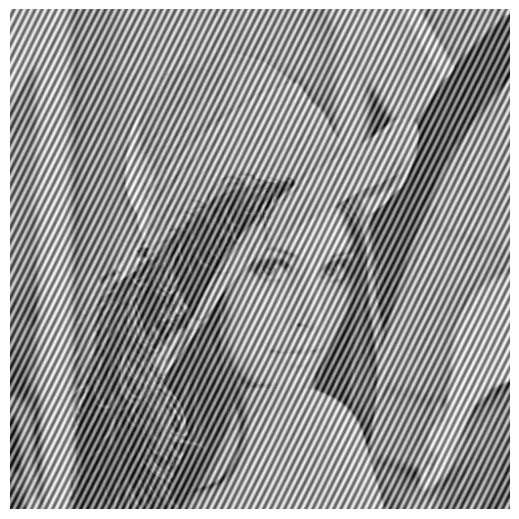

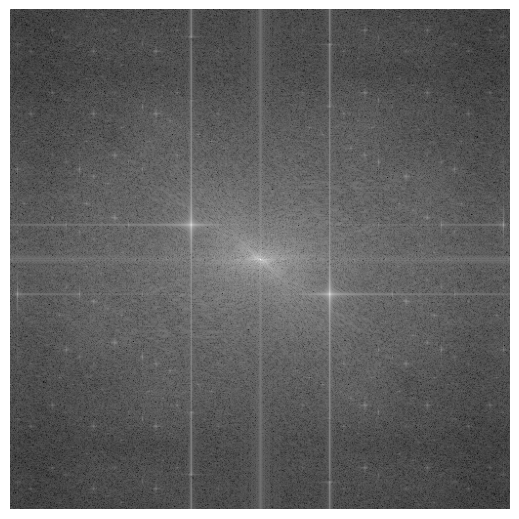

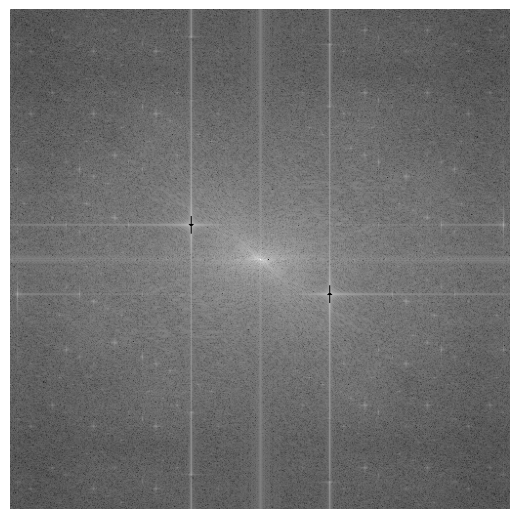

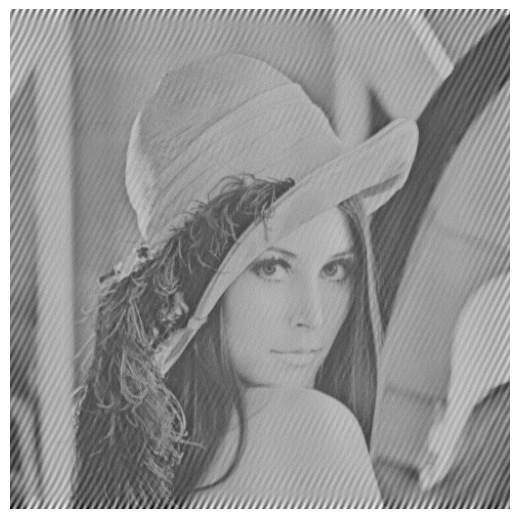

In [ ]:
noiserem(lena_diag)

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

2184.1810162862143


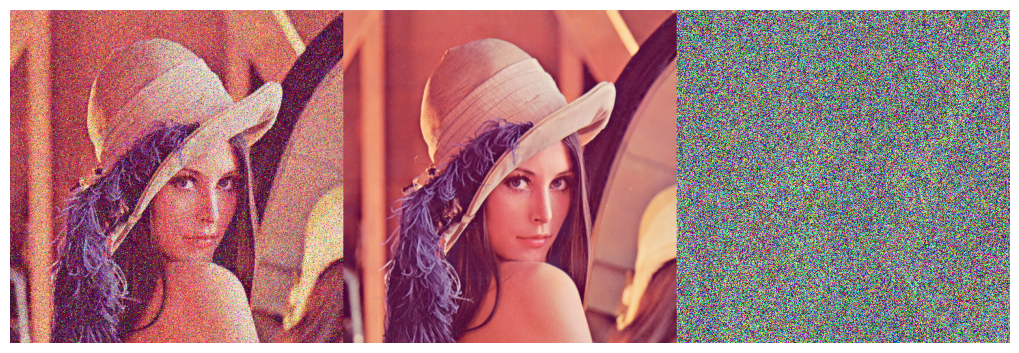

In [ ]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))


print(mse(img_noised, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored)]))

139.1152572631836


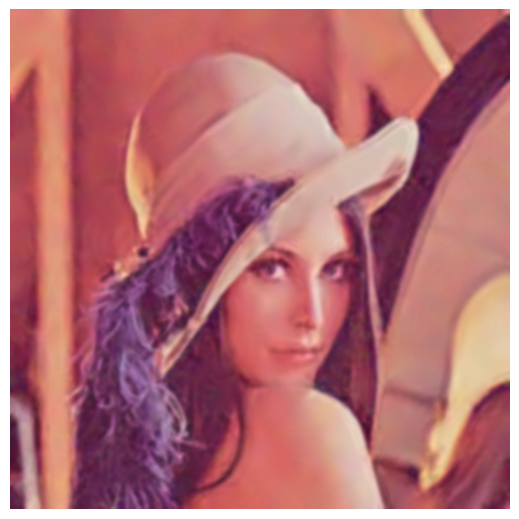

In [ ]:
#img_nonoise= cv2.medianBlur(img_noised,7)
img_nonoise = img_noised.copy()
#img_nonoise= cv2.blur(img_nonoise,(3,3))
img_nonoise = cv2.GaussianBlur(img_nonoise,(9,9),0)
img_nonoise = cv2.fastNlMeansDenoisingColored(img_nonoise,3, 5, 5, 21)
#img_nonoise = cv2.bilateralFilter(img_nonoise,9,200,200)
print(mse(img_nonoise, img_colored))
show_bgr(img_nonoise)

**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

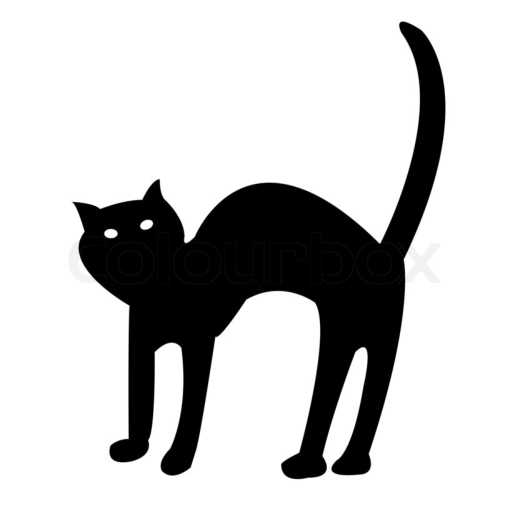

In [ ]:
img = cv2.imread(str(sources_path / "cat.jpg"), 0)
show_gray(img)

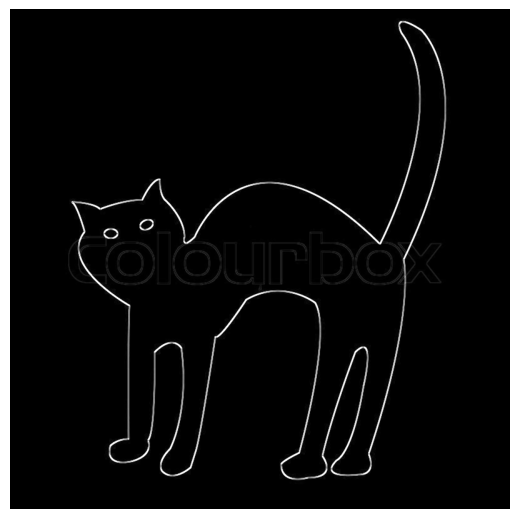

In [ ]:
#градиент и фильтры Собеля
grad_x = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_x = cv2.convertScaleAbs(grad_x)
grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
show_gray(grad)

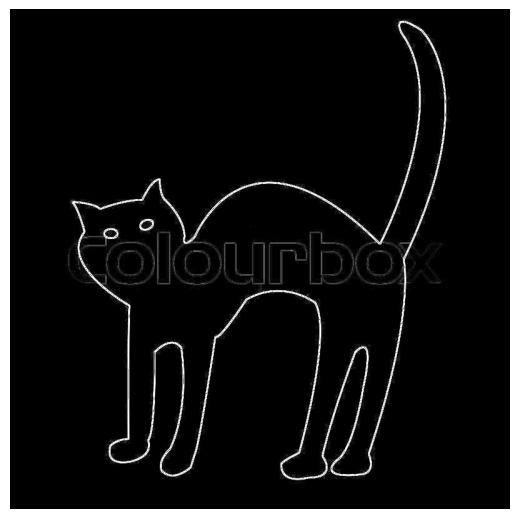

In [ ]:
lapl = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
lapl = cv2.convertScaleAbs(lapl)
show_gray(lapl)

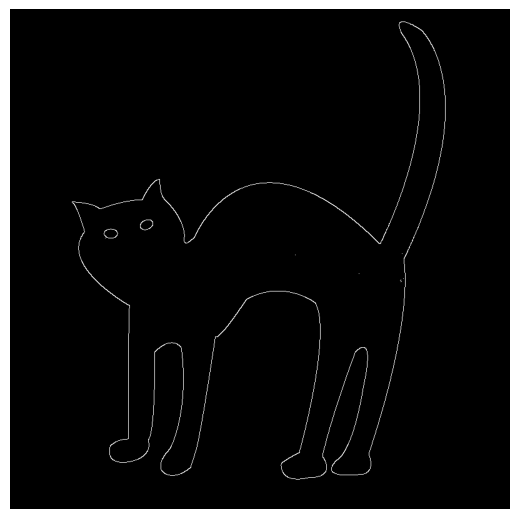

In [ ]:
canny = cv2.Canny(img,100,100)
show_gray(canny)